In [1]:
from shapely import Point , LineString , LinearRing , Polygon , MultiPoint , MultiLineString , MultiPolygon

# 1.子集

## shapely.ops.substring(geom, start_dist, end_dist[, normalized=False])

### 返回start_dist和end_dist之间的LineString，如果它们在同一位置，则返回一个Point。

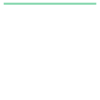

In [2]:
from shapely.ops import substring

ls = LineString((i, 0) for i in range(6))
ls

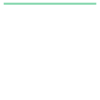

In [3]:
re1 = substring(ls , start_dist=1 , end_dist=3)
re1

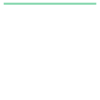

In [4]:
re2 = substring(ls , start_dist=3 , end_dist=1)
re2

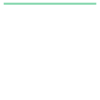

In [5]:
re3 = substring(ls , start_dist=1 , end_dist=-3)
re3

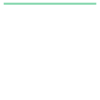

In [6]:
re4 = substring(ls , start_dist=0.2 , end_dist=-0.6 , normalized=True)
re4

Text(0.5, 1.0, 'd) start_dist=0.2 , end_dist=-0.6 , normalized=True')

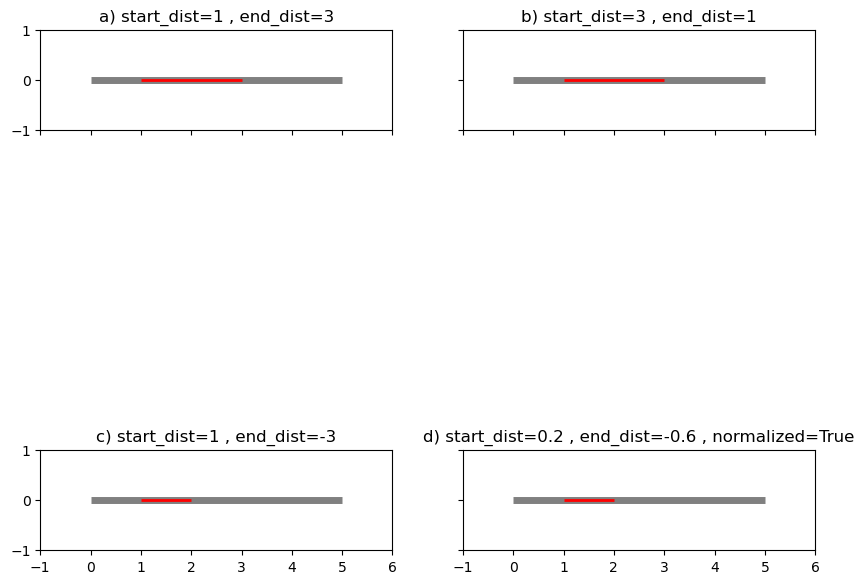

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(2,2 , figsize=(10,10) , sharex="all" , sharey="all")
f.subplots_adjust(hspace=0.2 , wspace=0.2)


gpd.GeoDataFrame([ls] , columns=["geometry"]).plot(ax=ax[0,0] , edgecolor="gray", linewidth=5)
gpd.GeoDataFrame([re1] , columns=["geometry"]).plot(ax=ax[0,0] , edgecolor="red", linewidth=2)
ax[0][0].set_xlim(-1 , 6)
ax[0][0].set_ylim(-1 , 1)
ax[0][0].set_title('a) start_dist=1 , end_dist=3')

gpd.GeoDataFrame([ls] , columns=["geometry"]).plot(ax=ax[0,1] , edgecolor="gray", linewidth=5)
gpd.GeoDataFrame([re2] , columns=["geometry"]).plot(ax=ax[0,1] , edgecolor="red", linewidth=2)
ax[0][1].set_title('b) start_dist=3 , end_dist=1')

gpd.GeoDataFrame([ls] , columns=["geometry"]).plot(ax=ax[1,0] , edgecolor="gray", linewidth=5)
gpd.GeoDataFrame([re3] , columns=["geometry"]).plot(ax=ax[1,0] , edgecolor="red", linewidth=2)
ax[1][0].set_title('c) start_dist=1 , end_dist=-3')

gpd.GeoDataFrame([ls] , columns=["geometry"]).plot(ax=ax[1,1] , edgecolor="gray", linewidth=5)
gpd.GeoDataFrame([re4] , columns=["geometry"]).plot(ax=ax[1,1] , edgecolor="red", linewidth=2)
ax[1][1].set_title('d) start_dist=0.2 , end_dist=-0.6 , normalized=True')

# 2.制备几何操作

## prepared.prep(ob)

### 创建并返回制备几何对象。

In [8]:
from shapely.prepared import prep

In [9]:
points = [Point(1, 1) , Point(2, 2) , Point(1, 0), Point(0.5, 1), Point(1.5, 0)] # large list of points
points

[<POINT (1 1)>, <POINT (2 2)>, <POINT (1 0)>, <POINT (0.5 1)>, <POINT (1.5 0)>]

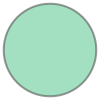

In [10]:
polygon = Point(1, 1).buffer(1.0)
polygon

<AxesSubplot:>

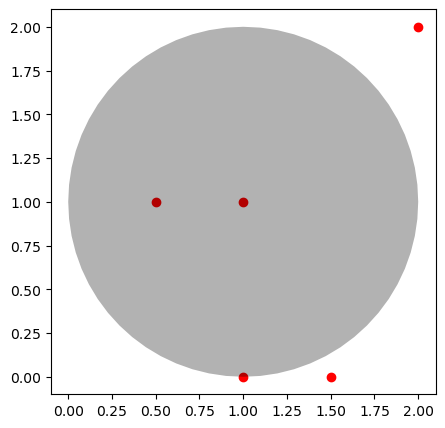

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

for i in range(len(points)):
    gpd.GeoDataFrame([points[i]] , columns=["geometry"]).plot(ax=ax , facecolor="red")
gpd.GeoDataFrame([polygon] , columns=["geometry"]).plot(ax=ax , facecolor="k", alpha=0.3)

In [12]:
# prepared.prep(ob)函数创建并返回制备几何对象
prepared_polygon = prep(polygon)
prepared_polygon

In [13]:
# 使用contains函数检测点是否在多边形内部
# 再使用filter函数过滤序列，返回符合条件的元素组成的新列表
hits = filter(prepared_polygon.contains, points)
hits

In [14]:
for x in hits:
    print(x.wkt)

POINT (1 1)
POINT (0.5 1)


# 3.极点

## shapely.ops.polylabel(polygon, tolerance)

### 找到给定多边形的极点（即离多边形轮廓最远的内部点，但不要与中心点混淆）大致位置。基于Vladimir Agafonkin的polylabel。

In [15]:
from shapely.ops import polylabel

polygon = LineString([(0, 0), (50, 200), (100, 100), (20, 50),(-100, -20), (-150, -200)]).buffer(100)

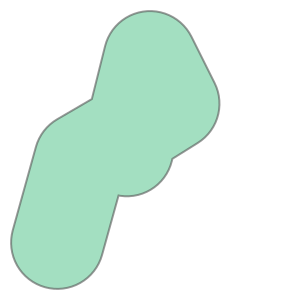

In [16]:
polygon

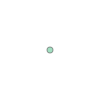

In [17]:
label = polylabel(polygon , tolerance=10)
label

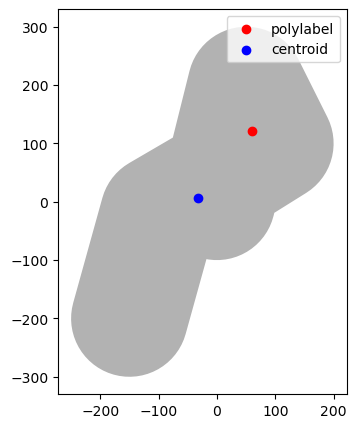

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([polygon] , columns=["geometry"]).plot(ax=ax , facecolor="k", alpha=0.3)

gpd.GeoDataFrame([label] , columns=["geometry"]).plot(ax=ax , facecolor="red",label="polylabel")
gpd.GeoDataFrame([polygon.centroid] , columns=["geometry"]).plot(ax=ax , facecolor="blue",label="centroid")

plt.legend()